# Day013
## EDA：把連續的變數離散化

## 為什麼要離散化
- 變得更簡單(可能性變少)
- 離散化的變數較穩定(Outlier影響力變小)

## 主要方法
離散化時，組的數量與寬度是關鍵。

- 等寬劃分: 按照相同寬度將資料劃分成等分，缺點是容易受異常值影響。
- 等頻劃分: 將資料分成幾等分，每等分資料裡面的個數是一樣的。
- 聚類劃分: 使用聚類演算法將資料聚成幾類，每一個類劃成一份。

## 離散化範例

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 建立範例資料
ages = pd.DataFrame({"age": [18,22,25,27,21,23,37,31,61,45,41,100]})

### 等寬劃分

In [3]:
ages["equal_width_age"] = pd.cut(ages["age"], 4)
ages["equal_width_age"].value_counts()

(17.918, 38.5]    8
(38.5, 59.0]      2
(79.5, 100.0]     1
(59.0, 79.5]      1
Name: equal_width_age, dtype: int64

> 每一個bin的範圍是一樣的

### 等頻劃分

In [4]:
ages["equal_freq_age"] = pd.qcut(ages["age"], 4)
ages["equal_freq_age"].value_counts()

(42.0, 100.0]      3
(29.0, 42.0]       3
(22.75, 29.0]      3
(17.999, 22.75]    3
Name: equal_freq_age, dtype: int64

> 每個bin的資料筆數相同

### 自定義的bin

In [5]:
ages["coustomized_age_grp"] = pd.cut(ages["age"], [10, 20, 30, 50, 100])
ages

,age,equal_width_age,equal_freq_age,coustomized_age_grp
0,18,"(17.918, 38.5]","(17.999, 22.75]","(10, 20]"
1,22,"(17.918, 38.5]","(17.999, 22.75]","(20, 30]"
2,25,"(17.918, 38.5]","(22.75, 29.0]","(20, 30]"
3,27,"(17.918, 38.5]","(22.75, 29.0]","(20, 30]"
4,21,"(17.918, 38.5]","(17.999, 22.75]","(20, 30]"
5,23,"(17.918, 38.5]","(22.75, 29.0]","(20, 30]"
6,37,"(17.918, 38.5]","(29.0, 42.0]","(30, 50]"
7,31,"(17.918, 38.5]","(29.0, 42.0]","(30, 50]"
8,61,"(59.0, 79.5]","(42.0, 100.0]","(50, 100]"
9,45,"(38.5, 59.0]","(42.0, 100.0]","(30, 50]"


## HW
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

### 之前做過的處理

In [6]:
# 設定 data_path
dir_data = '../Data/Part01/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

(112500.0, 135000.0]       48849
(180000.0, 225000.0]       44809
(99000.0, 112500.0]        36907
(25649.999, 81000.0]       33391
(147150.0, 162000.0]       31120
(162000.0, 180000.0]       30704
(81000.0, 99000.0]         30280
(270000.0, 117000000.0]    27161
(225000.0, 270000.0]       19957
(135000.0, 147150.0]        4333
Name: AMT_INCOME_TOTAL_grp, dtype: int64


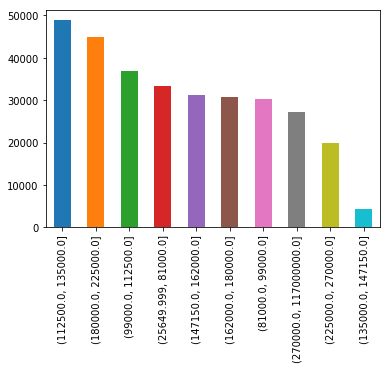

In [7]:
app_train['AMT_INCOME_TOTAL_grp'] = pd.qcut(app_train['AMT_INCOME_TOTAL'], 10)
count_grp = app_train['AMT_INCOME_TOTAL_grp'].value_counts()
print(count_grp)
count_grp.plot(kind='bar');

(35.099, 39.959]    41758
(39.959, 44.819]    40350
(30.238, 35.099]    38430
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(25.378, 30.238]    33127
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(20.469, 25.378]    13679
(64.26, 69.121]     11977
Name: DAYS_YEAR_grp, dtype: int64


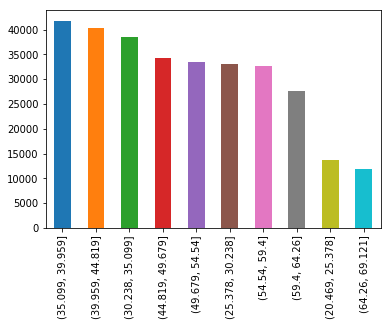

In [8]:
app_train['DAYS_YEAR_grp'] = pd.cut(app_train['DAYS_BIRTH'] / 365, 10)
year_count = app_train['DAYS_YEAR_grp'].value_counts()
print(year_count)
year_count.plot(kind='bar')